### Increasing the Maize Leaf Disease Dataset Using Contrast Technique

In [1]:
import PIL
import numpy as np
import os
import tensorflow as tf
import cv2
import keras
import pathlib
import glob
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy

### Loading of the data

In [2]:
data_dir=pathlib.Path(os.getcwd()+"/maize_leaf_diseases_dataset/") 
maize_disease_dataset=list(glob.glob(f"{data_dir}/data/*.jpg"))
len(maize_disease_dataset)

4186

### Converting images to pixels

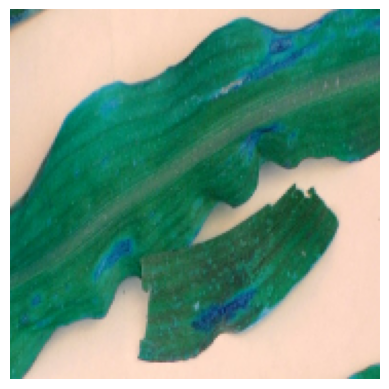

In [3]:
x=[]
for image in maize_disease_dataset:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    x.append(resized_img)
x=np.array(x)
plt.imshow(x[0])
plt.axis('off')
plt.show()

In [4]:
print(x[0])
print(x.dtype)

[[[ 29  86  77]
  [ 36  84  69]
  [ 28  84  60]
  ...
  [  1 110  84]
  [  1 103  75]
  [  2 109  86]]

 [[ 19  83  66]
  [ 24  79  58]
  [ 27  87  62]
  ...
  [  3 115  87]
  [  3 111  83]
  [  8 109  86]]

 [[ 25  85  71]
  [ 35  87  73]
  [ 30  85  69]
  ...
  [  5 120  95]
  [  4 118  96]
  [ 14 121 103]]

 ...

 [[ 26 135  96]
  [ 34 143 117]
  [ 20 136 105]
  ...
  [ 15 125  88]
  [ 16 124  85]
  [ 12 123  81]]

 [[ 22 131  96]
  [ 25 134 109]
  [ 17 133 106]
  ...
  [ 10 122  83]
  [ 11 116  79]
  [ 11 118  80]]

 [[ 20 131  97]
  [ 30 139 114]
  [ 26 140 119]
  ...
  [ 15 124  84]
  [ 14 117  81]
  [ 13 113  75]]]
uint8


### Test, Train Split

In [5]:
x_train,x_test=train_test_split(x,test_size=0.3,random_state=0) #Splitting
print(len(x_train))
print(len(x_test))

2930
1256


### Scalling the pixels to the range of 0...1

[[[0.64313725 0.62745098 0.65098039]
  [0.63921569 0.62745098 0.64705882]
  [0.64313725 0.63137255 0.65490196]
  ...
  [0.39215686 0.36078431 0.40392157]
  [0.32941176 0.29803922 0.34117647]
  [0.36470588 0.33333333 0.37254902]]

 [[0.63921569 0.62352941 0.64705882]
  [0.63529412 0.61960784 0.64313725]
  [0.63921569 0.62352941 0.64705882]
  ...
  [0.51764706 0.48627451 0.52941176]
  [0.43921569 0.40784314 0.45098039]
  [0.41176471 0.38039216 0.42352941]]

 [[0.65098039 0.63529412 0.65882353]
  [0.64313725 0.62745098 0.65098039]
  [0.65098039 0.63529412 0.65882353]
  ...
  [0.54901961 0.51764706 0.56078431]
  [0.54509804 0.51372549 0.55686275]
  [0.54901961 0.51764706 0.56078431]]

 ...

 [[0.55294118 0.50196078 0.52156863]
  [0.5372549  0.48235294 0.50588235]
  [0.51372549 0.45882353 0.48235294]
  ...
  [0.57254902 0.50980392 0.5372549 ]
  [0.55294118 0.49019608 0.51764706]
  [0.55686275 0.49411765 0.52156863]]

 [[0.51372549 0.45882353 0.48235294]
  [0.5254902  0.47058824 0.49411765]


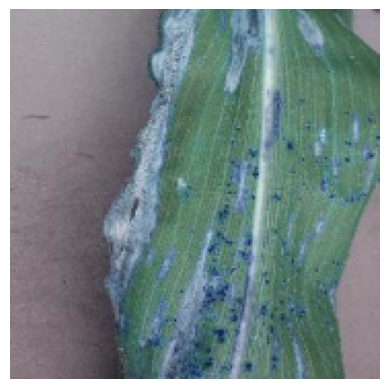

In [6]:
# Scalling
x_train_scaled=x_train/255 #Scale of 0.,1.0
x_test_scaled=x_test/255
print(x_train_scaled[0])
plt.imshow(x_train_scaled[0]) #Display image
plt.axis('off')
plt.show()

### Creating augmentation function 1

In [7]:
augmentation1=keras.Sequential([
    tf.keras.layers.RandomContrast(
    0.9, seed=None
)
])


### Augmenting the training data one

tf.Tensor(
[[[0.5221386  0.55393636 0.56455564]
  [0.52035636 0.55393636 0.5627734 ]
  [0.5221386  0.5557186  0.5663379 ]
  ...
  [0.40807408 0.4327428  0.45227337]
  [0.37955794 0.4042267  0.42375726]
  [0.39559826 0.420267   0.4380153 ]]

 [[0.52035636 0.5521541  0.5627734 ]
  [0.51857406 0.5503718  0.5609911 ]
  [0.52035636 0.5521541  0.5627734 ]
  ...
  [0.46510634 0.48977506 0.50930566]
  [0.42946118 0.4541299  0.47366047]
  [0.41698536 0.4416541  0.46118468]]

 [[0.52570313 0.5575009  0.5681202 ]
  [0.5221386  0.55393636 0.56455564]
  [0.52570313 0.5575009  0.5681202 ]
  ...
  [0.4793644  0.50403315 0.5235637 ]
  [0.47758216 0.5022509  0.52178144]
  [0.4793644  0.50403315 0.5235637 ]]

 ...

 [[0.48114666 0.4969041  0.5057411 ]
  [0.47401762 0.4879928  0.4986121 ]
  [0.46332407 0.47729924 0.48791853]
  ...
  [0.49005795 0.5004686  0.51287013]
  [0.48114666 0.49155733 0.5039589 ]
  [0.48292893 0.49333957 0.5057411 ]]

 [[0.46332407 0.47729924 0.48791853]
  [0.46867085 0.48264602 0

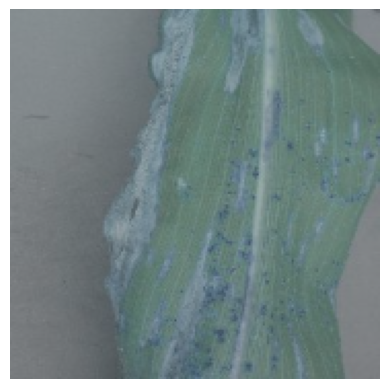

In [8]:
augmented_training1=augmentation1(x_train_scaled)
print(augmented_training1[0])
current_dir=pathlib.Path(os.getcwd())
try:
    if not os.path.isdir(str(current_dir)+"\Augmented"):
        os.mkdir("Augmented")
    os.chdir(str(current_dir)+"\Augmented")
    for i in range(len(augmented_training1)):
        plt.imsave(f"Augmented1_img{i}.jpg",augmented_training1[i].numpy())
except:
    pass
finally:
    os.chdir(str(current_dir))
plt.imshow(augmented_training1[0])
plt.axis('off')
plt.show()

### Augmentation function 2

In [9]:
augmentation2=Sequential([
    tf.keras.layers.RandomContrast(
    0.4, seed=None
    )
])


### Augmenting training data 2

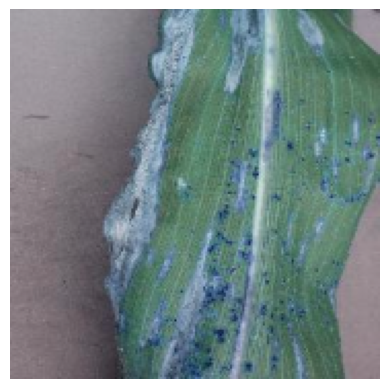

In [10]:
augmented_training2=augmentation2(x_train_scaled)
current_dir=pathlib.Path(os.getcwd())
try:
    if not os.path.isdir(str(current_dir)+"\Augmented"):
        os.mkdir("Augmented")
    os.chdir(str(current_dir)+"\Augmented")
    for i in range(len(augmented_training2)):
        plt.imsave(f"Augmented2_img{i}.jpg",augmented_training2[i].numpy())
except:
    pass
finally:
    os.chdir(str(current_dir))
plt.imshow(augmented_training2[0]) #Display our augmented image
plt.axis('off')
plt.show()

### Testing Image

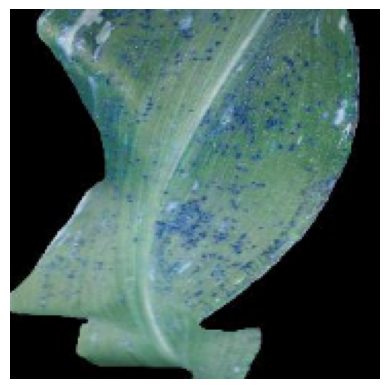

In [11]:
plt.imshow(x_test_scaled[1]) #Original test image,(Not augmented)
plt.axis('off')
plt.show()

### Augmenting test data 1

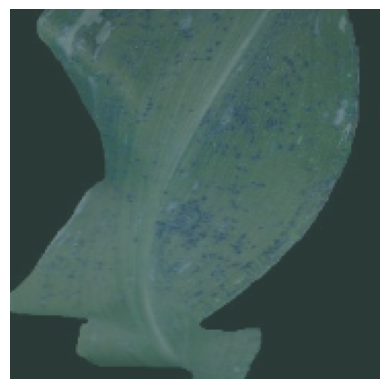

In [12]:
augmented_testing1=augmentation1(x_test_scaled) #factor- 0.9
plt.imshow(augmented_testing1[1]) #Display augmented image of a particular index
plt.axis('off')
plt.show()

### Augmenting test data 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


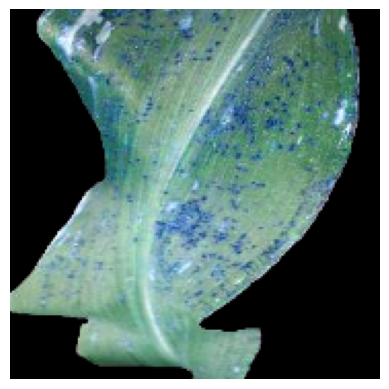

In [13]:
augmented_test2=augmentation2(x_test_scaled) #factor=0.4
plt.imshow(augmented_test2[1])
plt.axis('off')
plt.show()

# Classifying Original and Augmented images
### Loading the data

In [14]:
maize_leaf_disease_dict={
    "Original":list(glob.glob(f"{data_dir}/data/*.jpg")),
    "Augmented":list(glob.glob(f"{os.getcwd()}/Augmented/*.jpg"))
}
print(len(maize_leaf_disease_dict["Original"]))
print(len(maize_leaf_disease_dict["Augmented"]))

4186
5860


In [15]:
augmented_labels_dict={
    "Original":0,
    "Augmented":1
}

### Loading of the data

In [16]:
x,y=[],[]
for augmented_original,images in maize_leaf_disease_dict.items():
    for image in images:
        img=cv2.imread(str(image))#Convert image to pixels
        resized_img=cv2.resize(img,(180,180))#Images to be of same size
        x.append(resized_img)#Pixels
        y.append(augmented_labels_dict[augmented_original])#Label Random 0,1
print(x[0])
print(y[:5])
x=np.array(x)
y=np.array(y)

[[[ 29  86  77]
  [ 36  84  69]
  [ 28  84  60]
  ...
  [  1 110  84]
  [  1 103  75]
  [  2 109  86]]

 [[ 19  83  66]
  [ 24  79  58]
  [ 27  87  62]
  ...
  [  3 115  87]
  [  3 111  83]
  [  8 109  86]]

 [[ 25  85  71]
  [ 35  87  73]
  [ 30  85  69]
  ...
  [  5 120  95]
  [  4 118  96]
  [ 14 121 103]]

 ...

 [[ 26 135  96]
  [ 34 143 117]
  [ 20 136 105]
  ...
  [ 15 125  88]
  [ 16 124  85]
  [ 12 123  81]]

 [[ 22 131  96]
  [ 25 134 109]
  [ 17 133 106]
  ...
  [ 10 122  83]
  [ 11 116  79]
  [ 11 118  80]]

 [[ 20 131  97]
  [ 30 139 114]
  [ 26 140 119]
  ...
  [ 15 124  84]
  [ 14 117  81]
  [ 13 113  75]]]
[0, 0, 0, 0, 0]


### Test, Train split

In [17]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0) #Splitting
print(len(x_train))
print(len(x_test))

7032
3014


### Scaling

In [18]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255
print(x_train_scaled[0])

[[[0.07058824 0.16078431 0.0745098 ]
  [0.0627451  0.15686275 0.0627451 ]
  [0.03921569 0.1254902  0.01568627]
  ...
  [0.29019608 0.4745098  0.28235294]
  [0.41176471 0.59607843 0.40392157]
  [0.38431373 0.56862745 0.37647059]]

 [[0.05882353 0.14901961 0.0627451 ]
  [0.05490196 0.14901961 0.05490196]
  [0.04705882 0.13333333 0.02352941]
  ...
  [0.27843137 0.4627451  0.27058824]
  [0.38039216 0.56470588 0.37254902]
  [0.36078431 0.54509804 0.35294118]]

 [[0.05098039 0.14509804 0.05098039]
  [0.05882353 0.15686275 0.05490196]
  [0.0745098  0.16078431 0.04705882]
  ...
  [0.2745098  0.45490196 0.27058824]
  [0.36078431 0.54117647 0.35686275]
  [0.37254902 0.55294118 0.36862745]]

 ...

 [[0.21960784 0.37254902 0.06666667]
  [0.22352941 0.37647059 0.07058824]
  [0.21960784 0.38039216 0.0627451 ]
  ...
  [0.36862745 0.52156863 0.30196078]
  [0.32156863 0.46666667 0.24705882]
  [0.21960784 0.36470588 0.14509804]]

 [[0.21176471 0.36470588 0.05882353]
  [0.21568627 0.36862745 0.0627451 ]


### Creating our CNN Model
- MaxPooling2D- To reduce the size of the input and hence increase computation speed
- Dense function works with 1D thus we flatten the output tensor
- Dense layer is used to classify image based on the output from convolutional layer
> The Rectified Linear Unit activation function returns 0 if it receives any negative input, but for any positive value x it returns that value back

In [19]:
num_classes=2
model=Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),# Applied 16 filters of 3 X 3 Matrix
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    #128 neourons--> try and error
    layers.Dense(128,activation="relu"),
    layers.Dense(num_classes) #if 0 neuron is activated it means its Original, no activation(linear activation)
])

In [134]:
len(model.layers)

9

### Compiling the model
- Computes the loss between the labels and predictions
- Adam optimizer update the network with new weights
- How accurate the label of the model is equal to the prediction

In [20]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"]
             )

In [21]:
print(x_train_scaled.dtype)
print(y_train.dtype)

float64
int32


### Training the CNN Model
- The number of times the learning algorithm will pass through the entire training dataset

In [22]:
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
220/220 [==============================] - 127s 558ms/step - loss: 0.3560 - accuracy: 0.8542
Epoch 2/10
220/220 [==============================] - 125s 571ms/step - loss: 0.2040 - accuracy: 0.9179
Epoch 3/10
220/220 [==============================] - 124s 564ms/step - loss: 0.1730 - accuracy: 0.9295
Epoch 4/10
220/220 [==============================] - 123s 561ms/step - loss: 0.1491 - accuracy: 0.9424
Epoch 5/10
220/220 [==============================] - 123s 560ms/step - loss: 0.1189 - accuracy: 0.9548
Epoch 6/10
220/220 [==============================] - 126s 572ms/step - loss: 0.0997 - accuracy: 0.9632
Epoch 7/10
220/220 [==============================] - 130s 592ms/step - loss: 0.0724 - accuracy: 0.9728
Epoch 8/10
220/220 [==============================] - 131s 594ms/step - loss: 0.0743 - accuracy: 0.9737
Epoch 9/10
220/220 [==============================] - 137s 621ms/step - loss: 0.0515 - accuracy: 0.9821
Epoch 10/10
220/220 [==============================] - 116s 527m

In [23]:
model.evaluate(x_test_scaled,y_test)

95/95 [==============================] - 14s 140ms/step - loss: 0.0821 - accuracy: 0.9751


[0.08213236927986145, 0.9751161336898804]

### Loading of the test data

In [158]:
test_images=list(glob.glob(f"{os.getcwd()}/testing/*.jpg"))
print(len(test_images))
t=[]
for image in test_images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    t.append(resized_img)
t=np.array(t)
# plt.imshow(t[0])
# plt.axis('off')
# plt.show()

6


In [159]:
t_scale=t/255
print(t_scale)

[[[[0.56078431 0.54901961 0.52941176]
   [0.56078431 0.54901961 0.52941176]
   [0.56078431 0.54901961 0.52941176]
   ...
   [0.46666667 0.45098039 0.43137255]
   [0.43137255 0.41568627 0.39607843]
   [0.41568627 0.4        0.38039216]]

  [[0.56078431 0.54901961 0.52941176]
   [0.56078431 0.54901961 0.52941176]
   [0.56078431 0.54901961 0.52941176]
   ...
   [0.49803922 0.48235294 0.4627451 ]
   [0.47058824 0.45490196 0.43529412]
   [0.45882353 0.44313725 0.42352941]]

  [[0.56078431 0.54901961 0.52941176]
   [0.56078431 0.54901961 0.52941176]
   [0.56078431 0.54901961 0.52941176]
   ...
   [0.5254902  0.50980392 0.49019608]
   [0.50980392 0.49411765 0.4745098 ]
   [0.50588235 0.49019608 0.47058824]]

  ...

  [[0.49411765 0.48235294 0.46666667]
   [0.49411765 0.48235294 0.46666667]
   [0.49019608 0.47843137 0.4627451 ]
   ...
   [0.50196078 0.48627451 0.48235294]
   [0.50196078 0.48627451 0.48235294]
   [0.50588235 0.49019608 0.48627451]]

  [[0.49411765 0.48235294 0.46666667]
   [0.4

In [160]:
prediction=model.predict(t_scale)
score=tf.nn.softmax(prediction[2]) #Picks the set of values in the tensor and picks the biggest on
print(score)
print(np.argmax(score)) #Returns the index of the max value

tf.Tensor([1.2918222e-05 9.9998713e-01], shape=(2,), dtype=float32)
1


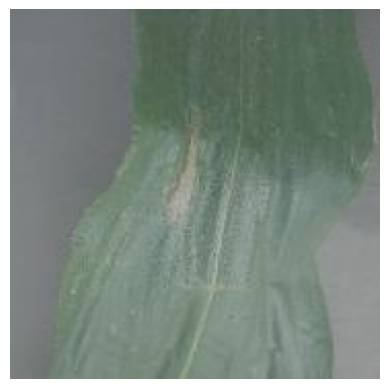

In [161]:
plt.imshow(t_scale[2])
plt.axis("off")
plt.show()

### Saving the model

In [26]:
model.save("augmentation_model") 

INFO:tensorflow:Assets written to: augmentation_model\assets


### Reconstruct a new model from the final model

In [27]:
reconstructed_model = keras.models.load_model("augmentation_model") 

In [28]:
maize_leaf_disease_dict

{'Original': ['C:\\Users\\User\\Projects\\IT_Project\\maize_leaf_diseases_dataset/data\\Corn_Blight (1).jpg',
  'C:\\Users\\User\\Projects\\IT_Project\\maize_leaf_diseases_dataset/data\\Corn_Blight (10).jpg',
  'C:\\Users\\User\\Projects\\IT_Project\\maize_leaf_diseases_dataset/data\\Corn_Blight (100).jpg',
  'C:\\Users\\User\\Projects\\IT_Project\\maize_leaf_diseases_dataset/data\\Corn_Blight (1000).JPG',
  'C:\\Users\\User\\Projects\\IT_Project\\maize_leaf_diseases_dataset/data\\Corn_Blight (1001).JPG',
  'C:\\Users\\User\\Projects\\IT_Project\\maize_leaf_diseases_dataset/data\\Corn_Blight (1002).JPG',
  'C:\\Users\\User\\Projects\\IT_Project\\maize_leaf_diseases_dataset/data\\Corn_Blight (1003).JPG',
  'C:\\Users\\User\\Projects\\IT_Project\\maize_leaf_diseases_dataset/data\\Corn_Blight (1004).JPG',
  'C:\\Users\\User\\Projects\\IT_Project\\maize_leaf_diseases_dataset/data\\Corn_Blight (1005).JPG',
  'C:\\Users\\User\\Projects\\IT_Project\\maize_leaf_diseases_dataset/data\\Corn_Blig

In [29]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [30]:
x_train

array([[[[ 18,  41,  19],
         [ 16,  40,  16],
         [ 10,  32,   4],
         ...,
         [ 74, 121,  72],
         [105, 152, 103],
         [ 98, 145,  96]],

        [[ 15,  38,  16],
         [ 14,  38,  14],
         [ 12,  34,   6],
         ...,
         [ 71, 118,  69],
         [ 97, 144,  95],
         [ 92, 139,  90]],

        [[ 13,  37,  13],
         [ 15,  40,  14],
         [ 19,  41,  12],
         ...,
         [ 70, 116,  69],
         [ 92, 138,  91],
         [ 95, 141,  94]],

        ...,

        [[ 56,  95,  17],
         [ 57,  96,  18],
         [ 56,  97,  16],
         ...,
         [ 94, 133,  77],
         [ 82, 119,  63],
         [ 56,  93,  37]],

        [[ 54,  93,  15],
         [ 55,  94,  16],
         [ 54,  95,  14],
         ...,
         [104, 143,  87],
         [ 83, 120,  64],
         [ 62,  99,  43]],

        [[ 54,  93,  15],
         [ 54,  93,  15],
         [ 54,  95,  14],
         ...,
         [ 69, 108,  52],
        